In [3]:
# Uplaoding the input files
from google.colab import files
uploaded=files.upload()

Saving ticket_df_final_beforesmote.csv to ticket_df_final_beforesmote (1).csv


In [4]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Numerical libraries
import numpy as np

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#importing scipy stats 
import scipy
import scipy.stats as st

# importing library to split datset
from sklearn.model_selection import train_test_split

# Imporitng library for oversampling/undersampling
from imblearn.over_sampling import SMOTE

# Imporing relevant models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

# improrting NLP related libraries
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer

# Importing libraries for finding accuracy, classification reports
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import re

import warnings
warnings.filterwarnings("ignore")
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Installing the fasttext library
pip install  fasttext

In [ ]:
# Installing the wordcloud library
pip install wordcloud

In [ ]:
#Downnloading FastText model
!wget -O lid.176.bin https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin

--2021-11-21 01:46:24--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.74.142, 172.67.9.4, 104.22.75.142, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.74.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  19.8MB/s    in 6.9s    

2021-11-21 01:46:31 (18.1 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [ ]:
#Reading dataset
ticket_df = pd.read_excel("input_data.xlsx")

In [ ]:
#Displaying shape od data
ticket_df.shape

(8500, 4)

Dataset has 8500 rows ans 4 *columns*




In [ ]:
#Displaying Assignment Group 
ticket_df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_35       1
GRP_64       1
GRP_61       1
GRP_73       1
GRP_70       1
Name: Assignment group, Length: 74, dtype: int64

In [ ]:
# Check top few records to get a feel of the data structure
ticket_df.head(10)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [ ]:
#Checking Null Values 
ticket_df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [ ]:
#Removing Null values
ticket_df.dropna(inplace = True)
ticket_df.isna().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

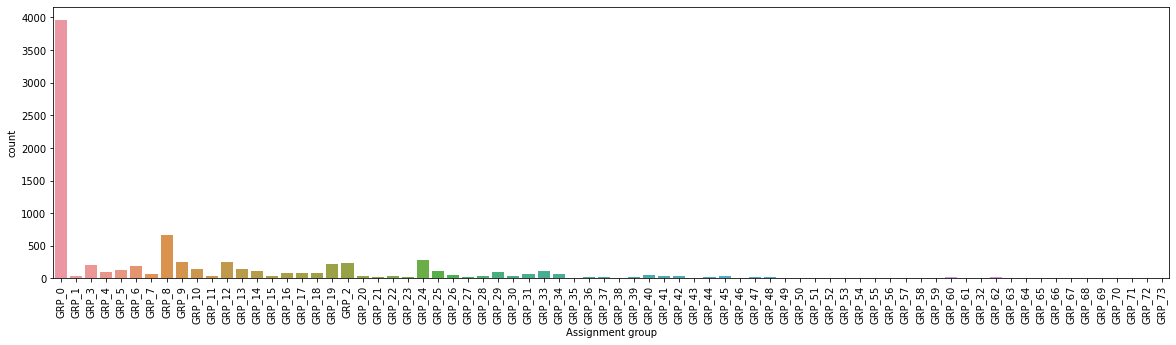

In [ ]:
#Displaying Assignment Group
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x=ticket_df["Assignment group"])

In [ ]:
# Before removing caller we can see that similar string is present in description, we can clean decription first
ticket_df['Caller email'] = ticket_df.apply(lambda x: x['Caller'].replace(' ', '.'), axis=1)
ticket_df['Caller email'] = ticket_df.apply(lambda x: x['Caller email'] + '@gmail.com', axis=1)
ticket_df.head(10)

,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [ ]:
# Removed the caller email from the description column
ticket_df['Description']=ticket_df.apply(lambda x: x['Description'].replace(x['Caller email'], ''), axis=1)
ticket_df.head(10)

,Short description,Description,Caller,Assignment group,Caller email
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,spxjnwir.pjlcoqds@gmail.com
1,outlook,"\r\n\r\nreceived from: \r\n\r\nhello team,\r\n...",hmjdrvpb komuaywn,GRP_0,hmjdrvpb.komuaywn@gmail.com
2,cant log in to vpn,\r\n\r\nreceived from: \r\n\r\nhi\r\n\r\ni can...,eylqgodm ybqkwiam,GRP_0,eylqgodm.ybqkwiam@gmail.com
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,xbkucsvz.gcpydteq@gmail.com
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,owlgqjme.qhcozdfx@gmail.com
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,eflahbxn.ltdgrvkz@gmail.com
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1,jyoqwxhz.clhxsoqy@gmail.com
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,eqzibjhw.ymebpoih@gmail.com
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,mdbegvct.dbvichlg@gmail.com
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,fumkcsji.sarmtlhy@gmail.com


In [ ]:
# Observation :: We will drop the caller email but later merge the caller with Description
ticket_df = ticket_df.drop(['Caller email'],axis=1)

In [ ]:
#remove spaces trailing
ticket_df['Short description'] = ticket_df['Short description'].str.strip()
ticket_df['Description'] = ticket_df['Description'].str.strip()

#remove tabs and carriage returns
ticket_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

#remove digits    
ticket_df['Description'] = ticket_df['Description'].replace('\d+', '', regex=True)
ticket_df['Short description'] = ticket_df['Short description'].replace('\d+', '', regex=True)
    
#remove more than 1 space
ticket_df.replace('\s+', ' ', regex=True, inplace=True)

#make lower case
ticket_df.apply(lambda x: x.astype(str).str.lower())

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,grp_0
1,outlook,"received from: hello team, my meetings/skype m...",hmjdrvpb komuaywn,grp_0
2,cant log in to vpn,received from: hi i cannot log on to vpn best,eylqgodm ybqkwiam,grp_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,grp_0
4,skype error,skype error,owlgqjme qhcozdfx,grp_0
...,...,...,...,...
8495,emails not coming in from zz mail,"received from: good afternoon, i am not receiv...",avglmrts vhqmtiua,grp_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,grp_0
8497,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,grp_0
8498,machine nã£o estã¡ funcionando,i am unable to access the machine utilities to...,ufawcgob aowhxjky,grp_62


 We have a few short descriptions common with description. Merging them as a set makes sense.

In [ ]:
#merge short Description & Description

ticket_df['isSubstr'] = ticket_df.apply(lambda x: x['Short description'] not in x['Description'], axis=1)

#Now we see many places short description is redundant. We will append short description to description if True only then drop short descrition
ticket_df_combined = ticket_df.copy()
ticket_df_combined.loc[ticket_df_combined['isSubstr'] == True, 'Description'] = ticket_df_combined['Short description'] + " "+ ticket_df_combined['Description']
#Drop Short description
ticket_df_combined = ticket_df_combined.drop(['Short description'],axis=1)
ticket_df_combined = ticket_df_combined.drop(['isSubstr'],axis=1)
ticket_df_combined.tail(10)

,Description,Caller,Assignment group
8490,check status in purchasing please contact ed p...,mpihysnw wrctgoan,GRP_29
8491,vpn for laptop received from: i need a vpn for...,jxgobwrm qkugdipo,GRP_34
8492,hr_tool etime option not visitble,tmopbken ibzougsd,GRP_0
8493,"erp fi - ob, two accounts to be added i am sor...",ipwjorsc uboapexr,GRP_10
8494,tablet needs reimaged due to multiple issues w...,cpmaidhj elbaqmtp,GRP_3
8495,emails not coming in from zz mail received fro...,avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando i am unable to ...,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,kqvbrspl jyzoklfx,GRP_49


In [ ]:
#append caller into description if not already present
ticket_df_combined['isCallerNotSubstr'] = ticket_df_combined.apply(lambda x: x['Caller'] not in x['Description'], axis=1)

#We will append caller to description if True only then drop short descrition
ticket_df_combined_caller = ticket_df_combined.copy()
ticket_df_combined_caller.loc[ticket_df_combined_caller['isCallerNotSubstr'] == True, 'Description'] = ticket_df_combined_caller['Description'] + " " +  ticket_df_combined_caller['Caller'] 

#Drop Caller
ticket_df_combined_caller = ticket_df_combined_caller.drop(['Caller'],axis=1)
ticket_df_combined_caller = ticket_df_combined_caller.drop(['isCallerNotSubstr'],axis=1)
ticket_df_combined_caller.tail(10)

,Description,Assignment group
8490,check status in purchasing please contact ed p...,GRP_29
8491,vpn for laptop received from: i need a vpn for...,GRP_34
8492,hr_tool etime option not visitble tmopbken ibz...,GRP_0
8493,"erp fi - ob, two accounts to be added i am sor...",GRP_10
8494,tablet needs reimaged due to multiple issues w...,GRP_3
8495,emails not coming in from zz mail received fro...,GRP_29
8496,telephony_software issue rbozivdq gmlhrtvp,GRP_0
8497,vip: windows password reset for tifpdchb pedxr...,GRP_0
8498,machine nÃ£o estÃ¡ funcionando i am unable to ...,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49


In [ ]:
# exploring the first 10 rows of ticket_df_combined_caller dataset
ticket_df_combined_caller.head(10)

,Description,Assignment group
0,login issue -verified user details.(employee# ...,GRP_0
1,"received from: hello team, my meetings/skype m...",GRP_0
2,cant log in to vpn received from: hi i cannot ...,GRP_0
3,unable to access hr_tool page xbkucsvz gcpydteq,GRP_0
4,skype error owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype...,GRP_0
6,event: critical:HostName_.company.com the valu...,GRP_1
7,ticket_no- employment status - new non-employe...,GRP_0
8,unable to disable add ins on outlook mdbegvct ...,GRP_0
9,ticket update on inplant_ fumkcsji sarmtlhy,GRP_0


In [ ]:
# MAke copy of description as NL_Description for NeuNet and ML_Description for Trad ML models
ticket_df_combined_caller['NL_Description'] = ticket_df_combined_caller['Description'].copy()
ticket_df_combined_caller['ML_Description'] = ticket_df_combined_caller['Description'].copy()
ticket_df_combined_caller.head()

,Description,Assignment group,NL_Description,ML_Description
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...
1,"received from: hello team, my meetings/skype m...",GRP_0,"received from: hello team, my meetings/skype m...","received from: hello team, my meetings/skype m..."
2,cant log in to vpn received from: hi i cannot ...,GRP_0,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...
3,unable to access hr_tool page xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page xbkucsvz gcpydteq,unable to access hr_tool page xbkucsvz gcpydteq
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx


In [ ]:
# checking the total count of duplicated records present
ticket_df_combined_caller.duplicated().sum()

960

In [ ]:
# dropping the duplicated records
ticket_df_combined_caller.drop_duplicates(inplace=True)

In [ ]:
# exploring the shape of ticket_df_combined_caller dataset
ticket_df_combined_caller.shape

(7531, 4)

##Classifing Ticket as system Generated and User Generated

In [ ]:
# filtering the recoreds from description column where ever ": " is present
ticket_df_combined_caller1=ticket_df_combined_caller[ticket_df_combined_caller["Description"].str.contains(": ",na=False)]

In [ ]:
# Creating a Message Type column and marking the filetered records as system generated
ticket_df_combined_caller1["Message Type"] =" System Generated"

In [ ]:
# Merging the dataset back with ticket_df_combined_caller dataset
ticket_df_combined_caller2 = pd.merge(ticket_df_combined_caller1, ticket_df_combined_caller,  how='right', on=['Description','Assignment group','NL_Description','ML_Description'])

In [ ]:
# Add the value "User generated" in the "Message Type" column of remainign records
ticket_df_combined_caller2.fillna("User Generated",inplace=True)

In [ ]:
# exploring the shape of updated dataset
ticket_df_combined_caller2.shape

(7531, 5)

In [ ]:
# exploring the first 5 rows of the updated dataset
ticket_df_combined_caller2.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,User Generated
1,"received from: hello team, my meetings/skype m...",GRP_0,"received from: hello team, my meetings/skype m...","received from: hello team, my meetings/skype m...",System Generated
2,cant log in to vpn received from: hi i cannot ...,GRP_0,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...,System Generated
3,unable to access hr_tool page xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page xbkucsvz gcpydteq,unable to access hr_tool page xbkucsvz gcpydteq,User Generated
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated


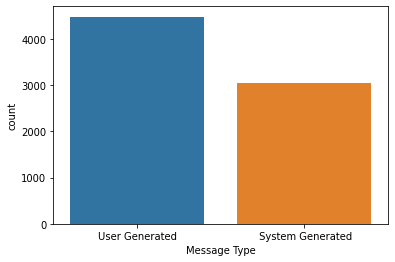

In [ ]:
# Plotting the frequency distributon of the Message Type column
sns.countplot(ticket_df_combined_caller2["Message Type"])

## Testing the accuracy on the updated dataset for classifying records into system and user generated tickets using naive bayes algorithm

# Taking a part of the updated dataset and running Naive Bayes on it to explore the accuracy in classifying the records as either System Generated or User Generated record

In [ ]:
#Validating regex on sample
naive=pd.read_excel("naive.xlsx")

In [ ]:
# Exploring the first 5 records of the test dataset
naive.head()

,Short description,Description,Caller,Assignment group,Overall desrciption,Message Type
0,outlook,received from: hmjdrvpb.komuaywn@gmail.com hel...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,0
1,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com hi ...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,0
2,event: critical:HostName_.company.com the valu...,event: critical:HostName_.company.com the valu...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_.company.com the valu...,0
3,unable to login to company vpn,"received from: xyz@company.com hi, i am unable...",chobktqj qdamxfuc,GRP_0,unable to login to company vpn received from: ...,0
4,vpn issue,received from: ugephfta.hrbqkvij@gmail.com hel...,ugephfta hrbqkvij,GRP_0,vpn issue received from: ugephfta.hrbqkvij@gma...,0


In [ ]:
# Exploring the shape of the test dataset
naive.shape

(241, 6)

In [ ]:
# Function to remove the non english characters

def nonEnglishChars(text):
    text = re.sub("[^a-zA-Z0-9\s]+", " ",text)
    return text

In [ ]:
# Removed the non english characters from the description column of the test dataset
naive["Description"]=naive["Description"].apply(lambda x: nonEnglishChars(x))

In [ ]:
# Initializing the countvectorizer
cv = CountVectorizer()

In [ ]:
# Applying the count vectorizer on the dataset
X = cv.fit_transform(naive["Description"])
y=naive["Message Type"]

In [ ]:
# Splitting the dataset into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Applying the NB on the training dataset
nb = MultinomialNB()
nb.fit(X_train,y_train)

MultinomialNB()

In [ ]:
# Predicting the results on the test dataset
predictions = nb.predict(X_test)

In [ ]:
# Checking the accuracy and classificaiton report
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))
print(" Accuracy",accuracy_score(y_test,predictions))

[[18  5]
 [ 4 22]]


              precision    recall  f1-score   support

           0       0.82      0.78      0.80        23
           1       0.81      0.85      0.83        26

    accuracy                           0.82        49
   macro avg       0.82      0.81      0.82        49
weighted avg       0.82      0.82      0.82        49

 Accuracy 0.8163265306122449


In [ ]:
# Predicting on the whole test dataset
y_final=nb.predict(X)

In [ ]:
# Added the predicted results in the model pred column 
naive["model pred"]=y_final
naive

,Short description,Description,Caller,Assignment group,Overall desrciption,Message Type,model pred
0,outlook,received from hmjdrvpb komuaywn gmail com hel...,hmjdrvpb komuaywn,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,0,0
1,cant log in to vpn,received from eylqgodm ybqkwiam gmail com hi ...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,0,0
2,event: critical:HostName_.company.com the valu...,event critical HostName company com the value...,jyoqwxhz clhxsoqy,GRP_1,event: critical:HostName_.company.com the valu...,0,0
3,unable to login to company vpn,received from xyz company com hi i am unable...,chobktqj qdamxfuc,GRP_0,unable to login to company vpn received from: ...,0,0
4,vpn issue,received from ugephfta hrbqkvij gmail com hel...,ugephfta hrbqkvij,GRP_0,vpn issue received from: ugephfta.hrbqkvij@gma...,0,0
...,...,...,...,...,...,...,...
236,reset the password for obvyknzx gzvjtish on er...,please reset my erp password SID,obvyknzx gzvjtish,GRP_0,reset the password for obvyknzx gzvjtish on er...,1,1
237,please reset password for user catgyhilp (ess ...,please reset password for user catgyhilp ess ...,usdykwvf oswvlmje,GRP_0,please reset password for user catgyhilp (ess ...,1,1
238,unable to connect to wifi,unable to connect to wifi,incjpxsq gdxbvaqz,GRP_0,unable to connect to wifi unable to connect to...,1,0
239,password reset erp SID_,password reset erp SID,rcukxbvw pvnuqlyb,GRP_0,password reset erp SID_ password reset erp SID_,1,1


In [ ]:
#remove more than 1 space
ticket_df_combined_caller2.replace('\s+', ' ', regex=True, inplace=True)
ticket_df_combined_caller2.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type
0,login issue -verified user details.(employee# ...,GRP_0,login issue -verified user details.(employee# ...,login issue -verified user details.(employee# ...,User Generated
1,"received from: hello team, my meetings/skype m...",GRP_0,"received from: hello team, my meetings/skype m...","received from: hello team, my meetings/skype m...",System Generated
2,cant log in to vpn received from: hi i cannot ...,GRP_0,cant log in to vpn received from: hi i cannot ...,cant log in to vpn received from: hi i cannot ...,System Generated
3,unable to access hr_tool page xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page xbkucsvz gcpydteq,unable to access hr_tool page xbkucsvz gcpydteq,User Generated
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated


In [ ]:
# Removing non english characters from all the 3 columns
ticket_df_combined_caller2["Description"]=ticket_df_combined_caller2["Description"].apply(lambda x: nonEnglishChars(x))
ticket_df_combined_caller2["NL_Description"]=ticket_df_combined_caller2["NL_Description"].apply(lambda x: nonEnglishChars(x))
ticket_df_combined_caller2["ML_Description"]=ticket_df_combined_caller2["ML_Description"].apply(lambda x: nonEnglishChars(x))

##Spelling Correction 

In [ ]:
# Explorign the first 5 records of the updated dataset
ticket_df_combined_caller2.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type
0,login issue verified user details employee ...,GRP_0,login issue verified user details employee ...,login issue verified user details employee ...,User Generated
1,received from hello team my meetings skype m...,GRP_0,received from hello team my meetings skype m...,received from hello team my meetings skype m...,System Generated
2,cant log in to vpn received from hi i cannot ...,GRP_0,cant log in to vpn received from hi i cannot ...,cant log in to vpn received from hi i cannot ...,System Generated
3,unable to access hr tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated


In [ ]:
# Installing pyspellchecker library
pip install pyspellchecker

In [ ]:
# Added function to check and correct the spelling of a word
from spellchecker import SpellChecker
def spelling(text):
    spell = SpellChecker()
    splits = text.split()
    for split in splits:
        text=text.replace(split,spell.correction(split))      
    return (text)

In [ ]:
# testing the spellchecker function on a test sentence
text="hr tool etime option not visitble"
spelling(text)

'he tool time option not visible'

In [ ]:
# Correcting the spelling of all the records from the description column
ticket_df_combined_caller2["Description"] = ticket_df_combined_caller2["Description"].apply(lambda x: spelling(x))

In [ ]:
# Copied the updated records to the other 2 columns
ticket_df_combined_caller['NL_Description'] = ticket_df_combined_caller['Description'].copy()
ticket_df_combined_caller['ML_Description'] = ticket_df_combined_caller['Description'].copy()

In [ ]:
# exploring the last 20 records from the updated dataset
ticket_df_combined_caller2.tail(20) 

,Description,Assignment group,NL_Description,ML_Description,Message Type
7511,unable to connect to hoitage itehdgty flying ...,GRP_0,unable to connect to HostName stehdgty jfhyin...,unable to connect to HostName stehdgty jfhyin...,User Generated
7512,customer group enhanced field receiied from h...,GRP_9,customer group enhanced field received from h...,customer group enhanced field received from h...,System Generated
7513,ess portal received from hi team i was going...,GRP_9,ess portal received from hi team i was going...,ess portal received from hi team i was going...,System Generated
7514,robot hostage is inactive rkupnshb gsmzfojw,GRP_8,robot HostName is inactive rkupnshb gsmzfojw,robot HostName is inactive rkupnshb gsmzfojw,User Generated
7515,from pacvbetl yptglhoe sent thursday august...,GRP_0,from pacvbetl yptglhoe sent thursday august...,from pacvbetl yptglhoe sent thursday august...,System Generated
7516,pleaie remove uier hugcadrn ixhlwdgt ralfteim...,GRP_2,please remove user hugcadrn ixhlwdgt ralfteim...,please remove user hugcadrn ixhlwdgt ralfteim...,User Generated
7517,ticket update on inc to user hbmwlprq ilfvyodx...,GRP_0,ticket update on inc to user hbmwlprq ilfvyodx...,ticket update on inc to user hbmwlprq ilfvyodx...,User Generated
7518,telephoiy softwaie is missiig fiom pa pa iecei...,GRP_3,telephony software is missing from pc pc recei...,telephony software is missing from pc pc recei...,System Generated
7519,erp account unlock name mfeyouli ndobtzpw lang...,GRP_0,erp account unlock name mfeyouli ndobtzpw lang...,erp account unlock name mfeyouli ndobtzpw lang...,System Generated
7520,account locked sdvlxbfe ptnahjkw,GRP_0,account locked sdvlxbfe ptnahjkw,account locked sdvlxbfe ptnahjkw,User Generated


In [ ]:
# exploring the na values in the updated dataset
ticket_df_combined_caller2.isna().sum()

Description         0
Assignment group    0
NL_Description      0
ML_Description      0
Message Type        0
dtype: int64

In [ ]:
#remove more than 1 space
ticket_df_combined_caller2.replace('\s+', ' ', regex=True, inplace=True)

In [ ]:
#Removing non english words
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

##Removing Non English words

In [ ]:
# Predicting the language of a sentence from the description column and added the language detail in the lang_predict column

#Ref :: https://amitness.com/2019/07/identify-text-language-python/

import fasttext

# pretrained model from :: https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
PRETRAINED_MODEL_PATH = 'lid.176.bin'
lang_detect_model = fasttext.load_model(PRETRAINED_MODEL_PATH)

def predict_lang(sentence):
    detected_lang = lang_detect_model.predict(sentence)[0]
    detected_lang = detected_lang[0].replace('__label__', '')
    return detected_lang;

ticket_df_combined_caller2['lang_predict'] = ticket_df_combined_caller2['Description'].apply(lambda v: predict_lang(v))
ticket_df_combined_caller2.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,lang_predict
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,en
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,en
2,cant log in to van received from hi i cannot l...,GRP_0,cant log in to vpn received from hi i cannot l...,cant log in to vpn received from hi i cannot l...,System Generated,en
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,en
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,en


In [ ]:
# Exploring the value count of the lang_predict column
ticket_df_combined_caller2['lang_predict'].value_counts()

en     6847
de      492
pl       35
fr       26
es       21
fi       20
nl       14
pt       12
fa        7
sl        6
ca        4
id        3
da        3
eo        3
et        3
hu        3
lb        3
cy        3
lv        2
ur        2
it        2
gl        2
cs        1
af        1
eu        1
als       1
so        1
ia        1
jv        1
ja        1
el        1
zh        1
br        1
ms        1
sh        1
uz        1
th        1
bn        1
sw        1
ru        1
Name: lang_predict, dtype: int64

In [ ]:
# Filtering the records where the language is english from the updated dataset
ticket_df_english = ticket_df_combined_caller2[ticket_df_combined_caller2.lang_predict.eq('en')]
print(ticket_df_english)

                                            Description  ... lang_predict
0     login issue verified user details employee man...  ...           en
1     received from hello team my meetings skype mee...  ...           en
2     cant log in to van received from hi i cannot l...  ...           en
3       unable to access he tool page xbkucsvz gcpydteq  ...           en
4                         skype error owlgqjme qhcozdfx  ...           en
...                                                 ...  ...          ...
7525  tablet needs rummaged due to multiple issues w...  ...           en
7526  emails not coming in from ze mail received fro...  ...           en
7527         telephony software issue rbozivdq gmlhrtvp  ...           en
7528  vip windows password reset for tifpdchb pedxru...  ...           en
7529  machiie i o est fuicioiaido i am uiable to acc...  ...           en

[6847 rows x 6 columns]


In [ ]:
# exploring the first 5 recoreds from the filtered dataset
ticket_df_english.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,lang_predict
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,en
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,en
2,cant log in to van received from hi i cannot l...,GRP_0,cant log in to vpn received from hi i cannot l...,cant log in to vpn received from hi i cannot l...,System Generated,en
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,en
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,en


In [ ]:
# Dropping the lang_predict column
ticket_df_english.drop('lang_predict', inplace = True, axis=1)

In [ ]:
# Adding the value counts of the target column from the updated dataset and saving it in dict form
group_frequency = dict(ticket_df_english['Assignment group'].value_counts())

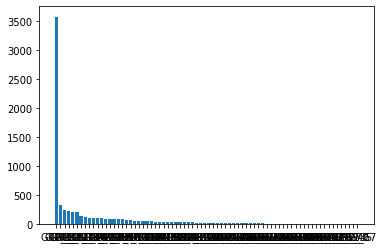

In [ ]:
# Plottin the above value count of the target column
plt.bar(range(len(group_frequency)), group_frequency.values(), align='center')
plt.xticks(range(len(group_frequency)), list(group_frequency.keys()))

plt.show()

In [ ]:
# Displaying the group frequency captured above
print (group_frequency)

{'GRP_0': 3580, 'GRP_8': 331, 'GRP_2': 235, 'GRP_12': 223, 'GRP_19': 213, 'GRP_3': 200, 'GRP_13': 139, 'GRP_14': 116, 'GRP_29': 96, 'GRP_4': 96, 'GRP_25': 95, 'GRP_24': 94, 'GRP_6': 86, 'GRP_18': 85, 'GRP_16': 83, 'GRP_9': 81, 'GRP_10': 77, 'GRP_7': 68, 'GRP_17': 66, 'GRP_5': 56, 'GRP_26': 54, 'GRP_31': 47, 'GRP_34': 46, 'GRP_40': 45, 'GRP_41': 40, 'GRP_15': 37, 'GRP_28': 37, 'GRP_33': 37, 'GRP_20': 34, 'GRP_22': 31, 'GRP_11': 29, 'GRP_45': 29, 'GRP_1': 28, 'GRP_21': 28, 'GRP_23': 23, 'GRP_47': 23, 'GRP_30': 20, 'GRP_27': 18, 'GRP_62': 17, 'GRP_39': 16, 'GRP_37': 16, 'GRP_44': 15, 'GRP_50': 14, 'GRP_36': 14, 'GRP_48': 12, 'GRP_60': 12, 'GRP_65': 11, 'GRP_53': 10, 'GRP_51': 8, 'GRP_52': 8, 'GRP_55': 8, 'GRP_42': 6, 'GRP_46': 5, 'GRP_59': 5, 'GRP_43': 5, 'GRP_66': 4, 'GRP_56': 3, 'GRP_68': 3, 'GRP_38': 3, 'GRP_49': 3, 'GRP_63': 3, 'GRP_58': 3, 'GRP_57': 2, 'GRP_54': 2, 'GRP_71': 2, 'GRP_32': 2, 'GRP_69': 2, 'GRP_73': 1, 'GRP_72': 1, 'GRP_61': 1, 'GRP_64': 1, 'GRP_70': 1, 'GRP_35': 1, 'GR

In [ ]:
# Converting the group freq into a dataframe
group_df = pd.DataFrame.from_dict(group_frequency, orient='index', columns=['frequency'])
group_df.head(10)

,frequency
GRP_0,3580
GRP_8,331
GRP_2,235
GRP_12,223
GRP_19,213
GRP_3,200
GRP_13,139
GRP_14,116
GRP_29,96
GRP_4,96


In [ ]:
# exploring the last 10 records of the updated dataset
group_df.tail(10)

,frequency
GRP_71,2
GRP_32,2
GRP_69,2
GRP_73,1
GRP_72,1
GRP_61,1
GRP_64,1
GRP_70,1
GRP_35,1
GRP_67,1


In [ ]:
#lets get the stats of this 
group_df.describe(percentiles=[0.1, .25, .5, .75, .95, .99]).transpose()

,count,mean,std,min,10%,25%,50%,75%,95%,99%,max
frequency,74.0,92.527027,415.823765,1.0,2.0,4.25,19.0,63.5,216.5,1208.23,3580.0


In [ ]:
# Calculating the percent representation as per the group frequency values
group_df['percent representation'] = group_df['frequency'] / group_df['frequency'].sum()
group_df.head(10)

,frequency,percent representation
GRP_0,3580,0.522857
GRP_8,331,0.048342
GRP_2,235,0.034322
GRP_12,223,0.032569
GRP_19,213,0.031109
GRP_3,200,0.029210
GRP_13,139,0.020301
GRP_14,116,0.016942
GRP_29,96,0.014021
GRP_4,96,0.014021


In [ ]:
# Calculating the cummulative percent represetation
group_df['cumulative percentage'] = group_df['percent representation'].cumsum(axis = 0)
group_df.head(35)

,frequency,percent representation,cumulative percentage
GRP_0,3580,0.522857,0.522857
GRP_8,331,0.048342,0.571199
GRP_2,235,0.034322,0.605521
GRP_12,223,0.032569,0.638090
GRP_19,213,0.031109,0.669198
GRP_3,200,0.029210,0.698408
GRP_13,139,0.020301,0.718709
GRP_14,116,0.016942,0.735651
GRP_29,96,0.014021,0.749671
GRP_4,96,0.014021,0.763692


#### Filter low data groups



In [ ]:
# adding a filter to drop groups based on a threshold value, for now we are using 0 as threshold. We can use it for the group bucketing approach.
group_elimination_treshold = 0

In [ ]:
# filtering the groups on the threshold value
group_frequency_filtered = dict(filter(lambda x: x[1] >= group_elimination_treshold, group_frequency.items()))

In [ ]:
# printing the group freq filtered values
print(group_frequency_filtered)

{'GRP_0': 3580, 'GRP_8': 331, 'GRP_2': 235, 'GRP_12': 223, 'GRP_19': 213, 'GRP_3': 200, 'GRP_13': 139, 'GRP_14': 116, 'GRP_29': 96, 'GRP_4': 96, 'GRP_25': 95, 'GRP_24': 94, 'GRP_6': 86, 'GRP_18': 85, 'GRP_16': 83, 'GRP_9': 81, 'GRP_10': 77, 'GRP_7': 68, 'GRP_17': 66, 'GRP_5': 56, 'GRP_26': 54, 'GRP_31': 47, 'GRP_34': 46, 'GRP_40': 45, 'GRP_41': 40, 'GRP_15': 37, 'GRP_28': 37, 'GRP_33': 37, 'GRP_20': 34, 'GRP_22': 31, 'GRP_11': 29, 'GRP_45': 29, 'GRP_1': 28, 'GRP_21': 28, 'GRP_23': 23, 'GRP_47': 23, 'GRP_30': 20, 'GRP_27': 18, 'GRP_62': 17, 'GRP_39': 16, 'GRP_37': 16, 'GRP_44': 15, 'GRP_50': 14, 'GRP_36': 14, 'GRP_48': 12, 'GRP_60': 12, 'GRP_65': 11, 'GRP_53': 10, 'GRP_51': 8, 'GRP_52': 8, 'GRP_55': 8, 'GRP_42': 6, 'GRP_46': 5, 'GRP_59': 5, 'GRP_43': 5, 'GRP_66': 4, 'GRP_56': 3, 'GRP_68': 3, 'GRP_38': 3, 'GRP_49': 3, 'GRP_63': 3, 'GRP_58': 3, 'GRP_57': 2, 'GRP_54': 2, 'GRP_71': 2, 'GRP_32': 2, 'GRP_69': 2, 'GRP_73': 1, 'GRP_72': 1, 'GRP_61': 1, 'GRP_64': 1, 'GRP_70': 1, 'GRP_35': 1, 'GR

In [ ]:
#Lets now filter the data frame and retain only the necessary groups(Filtered)
valid_grp_list = list(group_frequency_filtered)

In [ ]:
#eliminate
ticket_df_filtered = ticket_df_english[ticket_df_english['Assignment group'].isin(valid_grp_list)]
ticket_df_filtered.head(10)

,Description,Assignment group,NL_Description,ML_Description,Message Type
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated
2,cant log in to van received from hi i cannot l...,GRP_0,cant log in to vpn received from hi i cannot l...,cant log in to vpn received from hi i cannot l...,System Generated
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated
5,unable to log in to engineering tool and skype...,GRP_0,unable to log in to engineering tool and skype...,unable to log in to engineering tool and skype...,User Generated
6,event critical hostage company com the value o...,GRP_1,event critical HostName company com the value ...,event critical HostName company com the value ...,System Generated
7,ticket no employment itatui new non employee e...,GRP_0,ticket no employment status new non employee e...,ticket no employment status new non employee e...,User Generated
8,unable to disable add ins on outlook mdbegvct ...,GRP_0,unable to disable add ins on outlook mdbegvct ...,unable to disable add ins on outlook mdbegvct ...,User Generated
9,ticket update on implant fumkcsji sarmtlhy,GRP_0,ticket update on inplant fumkcsji sarmtlhy,ticket update on inplant fumkcsji sarmtlhy,User Generated


In [ ]:
# exploring the info of the updated dataset
ticket_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6847 entries, 0 to 7529
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       6847 non-null   object
 1   Assignment group  6847 non-null   object
 2   NL_Description    6847 non-null   object
 3   ML_Description    6847 non-null   object
 4   Message Type      6847 non-null   object
dtypes: object(5)
memory usage: 321.0+ KB


In [ ]:
# describing the updated dataset
ticket_df_filtered.describe()

,Description,Assignment group,NL_Description,ML_Description,Message Type
count,6847,6847,6847,6847,6847
unique,6757,74,6762,6762,2
top,received from monitoring tool company com job ...,GRP_0,received from monitoring tool company com job ...,received from monitoring tool company com job ...,User Generated
freq,20,3580,20,20,3968


In [ ]:
# exploring the shape of the updated dataset
ticket_df_filtered.shape

(6847, 5)

In [ ]:
# exploring the NA values in the updated dataset
ticket_df_filtered.isna().sum()

Description         0
Assignment group    0
NL_Description      0
ML_Description      0
Message Type        0
dtype: int64

In [ ]:
# installign the contractions lib
!pip install contractions
import contractions

In [ ]:
# Applying the contractions fix function on the ML_Description and NL_Description columns
ticket_df_filtered['ML_Description'] = ticket_df_filtered['ML_Description'].apply(lambda v: contractions.fix(v))
ticket_df_filtered['NL_Description'] = ticket_df_filtered['NL_Description'].apply(lambda v: contractions.fix(v))

In [ ]:
# exploring the first 5 records from the updated dataset

ticket_df_filtered.head(10)

,Description,Assignment group,NL_Description,ML_Description,Message Type
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated
2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated
5,unable to log in to engineering tool and skype...,GRP_0,unable to log in to engineering tool and skype...,unable to log in to engineering tool and skype...,User Generated
6,event critical hostage company com the value o...,GRP_1,event critical HostName company com the value ...,event critical HostName company com the value ...,System Generated
7,ticket no employment itatui new non employee e...,GRP_0,ticket no employment status new non employee e...,ticket no employment status new non employee e...,User Generated
8,unable to disable add ins on outlook mdbegvct ...,GRP_0,unable to disable add ins on outlook mdbegvct ...,unable to disable add ins on outlook mdbegvct ...,User Generated
9,ticket update on implant fumkcsji sarmtlhy,GRP_0,ticket update on inplant fumkcsji sarmtlhy,ticket update on inplant fumkcsji sarmtlhy,User Generated


In [ ]:
# downloading the stopwords from the nltk library

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# downlading the punkt package from nltk lib
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
snow = SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# creating a set of english stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

# Apply stopwords only For ML
ticket_df_filtered['tok_desc'] = ticket_df_filtered.apply(lambda row: nltk.word_tokenize(row['ML_Description']), axis=1)
ticket_df_filtered['tok_desc']=ticket_df_filtered['tok_desc'].apply(lambda x: [item for item in x if item not in stop_words])

In [ ]:
# function to get stemmed list
def get_stemmed_list(list):
  output = []
  for i in list: 
    output.append(snow.stem(i))
  return output
    
ticket_df_filtered['tok_desc_stemmed'] = ticket_df_filtered['tok_desc'].apply(lambda v: get_stemmed_list(v))

In [ ]:
# exploring the first 5 records of the updated dataset

ticket_df_filtered.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,tok_desc,tok_desc_stemmed
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m..."
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,"[received, hello, team, meetings, skype, meeti...","[receiv, hello, team, meet, skype, meet, etc, ..."
2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated,"[log, vpn, received, hi, log, vpn, best, eylqg...","[log, vpn, receiv, hi, log, vpn, best, eylqgod..."
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,"[unable, access, hr, tool, page, xbkucsvz, gcp...","[unabl, access, hr, tool, page, xbkucsvz, gcpy..."
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,"[skype, error, owlgqjme, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]"


In [ ]:
# downloadign the averaged_perceptron_tagger package

nltk.download('averaged_perceptron_tagger')

ticket_df_filtered['tok_desc_pos'] = ticket_df_filtered['tok_desc'].apply(lambda v: pos_tag(v))

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# exploring the first 5 records of the udpated dataset
ticket_df_filtered.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,tok_desc,tok_desc_stemmed,tok_desc_pos
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u..."
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,"[received, hello, team, meetings, skype, meeti...","[receiv, hello, team, meet, skype, meet, etc, ...","[(received, VBN), (hello, JJ), (team, NN), (me..."
2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated,"[log, vpn, received, hi, log, vpn, best, eylqg...","[log, vpn, receiv, hi, log, vpn, best, eylqgod...","[(log, NN), (vpn, NN), (received, VBD), (hi, J..."
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,"[unable, access, hr, tool, page, xbkucsvz, gcp...","[unabl, access, hr, tool, page, xbkucsvz, gcpy...","[(unable, JJ), (access, NN), (hr, NN), (tool, ..."
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,"[skype, error, owlgqjme, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (owlgqjme, NN), (qh..."


In [ ]:
#  Adding fucntions to get pos tags and lemmatized list
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

def get_lemmatized_list(list):
  output = []
  for token, tag in list: 
    wntag = get_wordnet_pos(tag)
    if wntag is None:# not supply tag in case of None
        lemma = lemmatizer.lemmatize(token) 
    else:
        lemma = lemmatizer.lemmatize(token, pos=wntag) 
    output.append(lemma)
  return output

ticket_df_filtered['tok_desc_lemma'] = ticket_df_filtered['tok_desc_pos'].apply(lambda v: get_lemmatized_list(v))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# exploring the first 5 records
ticket_df_filtered.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,tok_desc,tok_desc_stemmed,tok_desc_pos,tok_desc_lemma
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u...","[login, issue, verify, user, detail, employee,..."
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,"[received, hello, team, meetings, skype, meeti...","[receiv, hello, team, meet, skype, meet, etc, ...","[(received, VBN), (hello, JJ), (team, NN), (me...","[receive, hello, team, meeting, skype, meeting..."
2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated,"[log, vpn, received, hi, log, vpn, best, eylqg...","[log, vpn, receiv, hi, log, vpn, best, eylqgod...","[(log, NN), (vpn, NN), (received, VBD), (hi, J...","[log, vpn, receive, hi, log, vpn, best, eylqgo..."
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,"[unable, access, hr, tool, page, xbkucsvz, gcp...","[unabl, access, hr, tool, page, xbkucsvz, gcpy...","[(unable, JJ), (access, NN), (hr, NN), (tool, ...","[unable, access, hr, tool, page, xbkucsvz, gcp..."
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,"[skype, error, owlgqjme, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (owlgqjme, NN), (qh...","[skype, error, owlgqjme, qhcozdfx]"


In [ ]:
# copying the updated filtered dataset
ticket_df_final = ticket_df_filtered.copy()

In [ ]:
# exploring the tok_desc_lemma column values
ticket_df_final['tok_desc_lemma'].values

array([list(['login', 'issue', 'verify', 'user', 'detail', 'employee', 'manager', 'name', 'check', 'user', 'name', 'ad', 'reset', 'password', 'advise', 'user', 'login', 'check', 'caller', 'confirm', 'able', 'login', 'issue', 'resolve', 'spxjnwir', 'pjlcoqds']),
       list(['receive', 'hello', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind', 'hmjdrvpb', 'komuaywn']),
       list(['log', 'vpn', 'receive', 'hi', 'log', 'vpn', 'best', 'eylqgodm', 'ybqkwiam']),
       ...,
       list(['telephony', 'software', 'issue', 'rbozivdq', 'gmlhrtvp']),
       list(['vip', 'window', 'password', 'reset', 'tifpdchb', 'pedxruyf', 'oybwdsgx', 'oxyhwrfz']),
       list(['machine', 'n', 'est', 'funcionando', 'unable', 'access', 'machine', 'utility', 'finish', 'drawer', 'adjustment', 'setting', 'network', 'ufawcgob', 'aowhxjky'])],
      dtype=object)

In [ ]:
# function to get BOW
def get_bag_of_words(arrOfLists):
  output = "";
  #print (arrOfLists)
  for wordList in arrOfLists:
    #print (wordList)
    for word in wordList:
      #print (word)
      output = output+ " " + word
  return output

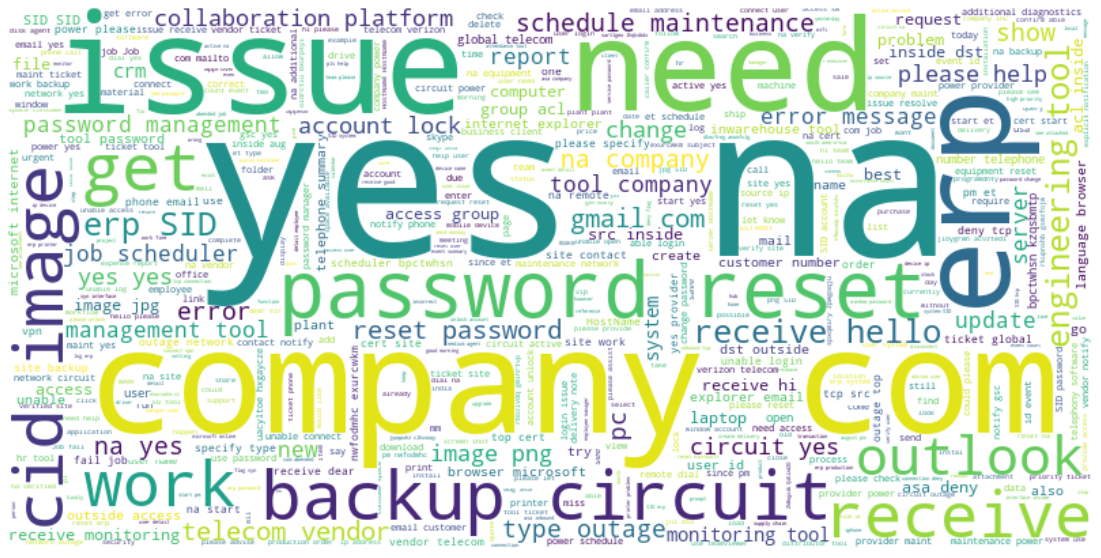

In [ ]:
#word cloud for top 3 groups data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#word cloud for overall data
stopwords = STOPWORDS

#GRP_0     3976
ticket_df_grp0 = ticket_df_final.copy()
ticket_df_grp0[ticket_df_grp0['Assignment group'].apply(lambda x : x =='GRP_0')]
wordcloud_grp0 = WordCloud(stopwords = stop_words, max_words=500, background_color="white",width=800, height=400).generate(get_bag_of_words(ticket_df_grp0['tok_desc_lemma'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp0,interpolation='bilinear')
plt.axis("off")
plt.show()


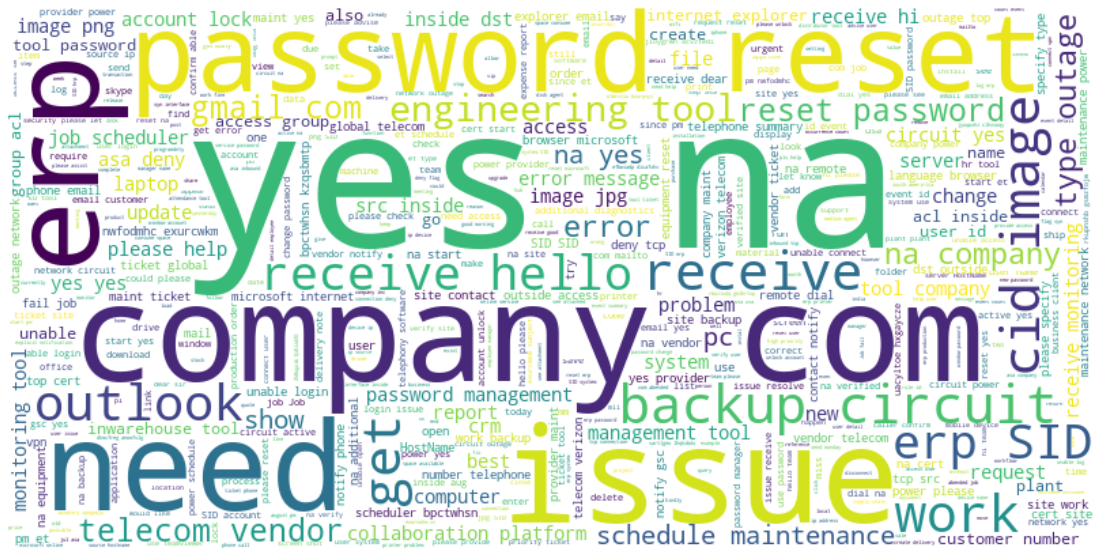

In [ ]:
#GRP_24     289
ticket_df_grp24 = ticket_df_final.copy()
ticket_df_grp24[ticket_df_grp24['Assignment group'].apply(lambda x : x =='GRP_8')]
wordcloud_grp24 = WordCloud(stopwords = stop_words, max_words=500, background_color="white",width=800, height=400).generate(get_bag_of_words(ticket_df_grp24['tok_desc_lemma'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp24,interpolation='bilinear')
plt.axis("off")
plt.show()

##SVM (with imbalance data)

In [ ]:
# exploring the first 5 records
ticket_df_final.head()

,Description,Assignment group,NL_Description,ML_Description,Message Type,tok_desc,tok_desc_stemmed,tok_desc_pos,tok_desc_lemma
0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,"[login, issue, verified, user, details, employ...","[login, issu, verifi, user, detail, employe, m...","[(login, JJ), (issue, NN), (verified, VBD), (u...","[login, issue, verify, user, detail, employee,..."
1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,"[received, hello, team, meetings, skype, meeti...","[receiv, hello, team, meet, skype, meet, etc, ...","[(received, VBN), (hello, JJ), (team, NN), (me...","[receive, hello, team, meeting, skype, meeting..."
2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated,"[log, vpn, received, hi, log, vpn, best, eylqg...","[log, vpn, receiv, hi, log, vpn, best, eylqgod...","[(log, NN), (vpn, NN), (received, VBD), (hi, J...","[log, vpn, receive, hi, log, vpn, best, eylqgo..."
3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,"[unable, access, hr, tool, page, xbkucsvz, gcp...","[unabl, access, hr, tool, page, xbkucsvz, gcpy...","[(unable, JJ), (access, NN), (hr, NN), (tool, ...","[unable, access, hr, tool, page, xbkucsvz, gcp..."
4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,"[skype, error, owlgqjme, qhcozdfx]","[skype, error, owlgqjm, qhcozdfx]","[(skype, JJ), (error, NN), (owlgqjme, NN), (qh...","[skype, error, owlgqjme, qhcozdfx]"


In [ ]:
# applying the count vectorizer on the ML_Description column
X = cv.fit_transform(ticket_df_english["ML_Description"])
y=ticket_df_english["Assignment group"]

In [ ]:
# splitting the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.20, random_state = 42)

In [ ]:
# Initializing the SVM model

svc = SVC(gamma=0.001, C=10,kernel="rbf")
svc.fit(X_train, y_train)

SVC(C=10, gamma=0.001)

In [ ]:
# Printing the accuracy of the training dataset
print("Accuracy on training set",(svc.score(X_train, y_train)))

Accuracy on training set 0.7535146978272778


In [ ]:
# Printing the accuracy of the test dataset
print("Accuracy on test set",(svc.score(X_test, y_test)))

Accuracy on test set 0.6102189781021898


In [ ]:
# predicting the values on the test dataset
y_pred=svc.predict(X_test)

In [ ]:
# printing the accuracy score on the test dataset
accuracy_score(y_pred,y_test)

0.6102189781021898

In [ ]:
# displaying the classification report on the test dataset and the predicted ouput
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

       GRP_0       0.98      0.61      0.75      1116
       GRP_1       0.00      0.00      0.00         0
      GRP_10       0.00      0.00      0.00         2
      GRP_11       0.00      0.00      0.00         0
      GRP_12       0.50      0.51      0.50        53
      GRP_13       0.33      0.54      0.41        13
      GRP_14       0.24      0.83      0.37         6
      GRP_15       0.25      1.00      0.40         2
      GRP_16       0.20      0.75      0.32         4
      GRP_17       1.00      1.00      1.00        13
      GRP_18       0.15      0.33      0.21         6
      GRP_19       0.07      1.00      0.14         3
       GRP_2       0.19      0.56      0.28        18
      GRP_20       0.00      0.00      0.00         0
      GRP_21       0.00      0.00      0.00         0
      GRP_22       0.20      1.00      0.33         1
      GRP_23       0.00      0.00      0.00         0
      GRP_24       0.25    

In [ ]:
# saving the final dataset into a csv file
ticket_df_final.to_csv("ticket_df_final_beforesmote.csv")

# Imbalance

In [5]:
# reading the final saved datset from the csv file
ticket_df_final=pd.read_csv("ticket_df_final_beforesmote.csv")

In [6]:
# Increasing the records of the groups where the records are less than 4 in order to apply oversampling technique SMOTE
ticket_df_final = pd.concat([ticket_df_final,ticket_df_final.loc[ticket_df_final[ticket_df_final['Assignment group'].isin(['GRP_61','GRP_70','GRP_67','GRP_35','GRP_73','GRP_57','GRP_69','GRP_72','GRP_71','GRP_64','GRP_38','GRP_58','GRP_56','GRP_63','GRP_54','GRP_68','GRP_32','GRP_49'])].index.repeat(3)]]).reset_index(drop=True)


In [7]:
ticket_df_final['Assignment group'].value_counts()

GRP_0     3580
GRP_8      331
GRP_2      235
GRP_12     223
GRP_19     213
          ... 
GRP_61       4
GRP_66       4
GRP_64       4
GRP_67       4
GRP_35       4
Name: Assignment group, Length: 74, dtype: int64

In [8]:
# exploring the updated dataset
ticket_df_final

,Unnamed: 0,Description,Assignment group,NL_Description,ML_Description,Message Type,tok_desc,tok_desc_stemmed,tok_desc_pos,tok_desc_lemma
0,0,login issue verified user details employee man...,GRP_0,login issue verified user details employee man...,login issue verified user details employee man...,User Generated,"['login', 'issue', 'verified', 'user', 'detail...","['login', 'issu', 'verifi', 'user', 'detail', ...","[('login', 'JJ'), ('issue', 'NN'), ('verified'...","['login', 'issue', 'verify', 'user', 'detail',..."
1,1,received from hello team my meetings skype mee...,GRP_0,received from hello team my meetings skype mee...,received from hello team my meetings skype mee...,System Generated,"['received', 'hello', 'team', 'meetings', 'sky...","['receiv', 'hello', 'team', 'meet', 'skype', '...","[('received', 'VBN'), ('hello', 'JJ'), ('team'...","['receive', 'hello', 'team', 'meeting', 'skype..."
2,2,cant log in to van received from hi i cannot l...,GRP_0,cannot log in to vpn received from hi i cannot...,cannot log in to vpn received from hi i cannot...,System Generated,"['log', 'vpn', 'received', 'hi', 'log', 'vpn',...","['log', 'vpn', 'receiv', 'hi', 'log', 'vpn', '...","[('log', 'NN'), ('vpn', 'NN'), ('received', 'V...","['log', 'vpn', 'receive', 'hi', 'log', 'vpn', ..."
3,3,unable to access he tool page xbkucsvz gcpydteq,GRP_0,unable to access hr tool page xbkucsvz gcpydteq,unable to access hr tool page xbkucsvz gcpydteq,User Generated,"['unable', 'access', 'hr', 'tool', 'page', 'xb...","['unabl', 'access', 'hr', 'tool', 'page', 'xbk...","[('unable', 'JJ'), ('access', 'NN'), ('hr', 'N...","['unable', 'access', 'hr', 'tool', 'page', 'xb..."
4,4,skype error owlgqjme qhcozdfx,GRP_0,skype error owlgqjme qhcozdfx,skype error owlgqjme qhcozdfx,User Generated,"['skype', 'error', 'owlgqjme', 'qhcozdfx']","['skype', 'error', 'owlgqjm', 'qhcozdfx']","[('skype', 'JJ'), ('error', 'NN'), ('owlgqjme'...","['skype', 'error', 'owlgqjme', 'qhcozdfx']"
...,...,...,...,...,...,...,...,...,...,...
6947,7247,job que from the egg application stopped the j...,GRP_58,job qeue from the engg application stopped the...,job qeue from the engg application stopped the...,User Generated,"['job', 'qeue', 'engg', 'application', 'stoppe...","['job', 'qeue', 'engg', 'applic', 'stop', 'job...","[('job', 'NN'), ('qeue', 'NNS'), ('engg', 'JJ'...","['job', 'qeue', 'engg', 'application', 'stop',..."
6948,7247,job que from the egg application stopped the j...,GRP_58,job qeue from the engg application stopped the...,job qeue from the engg application stopped the...,User Generated,"['job', 'qeue', 'engg', 'application', 'stoppe...","['job', 'qeue', 'engg', 'applic', 'stop', 'job...","[('job', 'NN'), ('qeue', 'NNS'), ('engg', 'JJ'...","['job', 'qeue', 'engg', 'application', 'stop',..."
6949,7273,ofteai so not working i i unable to log in to ...,GRP_73,oneteam sso not working i m unable to log in t...,oneteam sso not working i m unable to log in t...,User Generated,"['oneteam', 'sso', 'working', 'unable', 'log',...","['oneteam', 'sso', 'work', 'unabl', 'log', 'hr...","[('oneteam', 'NN'), ('sso', 'NN'), ('working',...","['oneteam', 'sso', 'work', 'unable', 'log', 'h..."
6950,7273,ofteai so not working i i unable to log in to ...,GRP_73,oneteam sso not working i m unable to log in t...,oneteam sso not working i m unable to log in t...,User Generated,"['oneteam', 'sso', 'working', 'unable', 'log',...","['oneteam', 'sso', 'work', 'unabl', 'log', 'hr...","[('oneteam', 'NN'), ('sso', 'NN'), ('working',...","['oneteam', 'sso', 'work', 'unable', 'log', 'h..."


In [9]:
# defining the max len of the sequence records and len_voc
max_len = 50
len_voc = 40000

In [10]:
# added function to create tokenizer

def make_tokenizer(texts, len_voc):
    t = Tokenizer(num_words=len_voc)
    t.fit_on_texts(texts)
    return t

In [11]:
# applying the make tokenizer function on the description column
tokenizer = make_tokenizer(ticket_df_final['Description'], len_voc)

In [12]:
# created sequences from the description column
sequences = tokenizer.texts_to_sequences(ticket_df_final['Description'])

In [13]:
# padded the sequences as per the max_len value

padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [14]:
# Importing the Glove embedding values and creating the embeddings_index for each word
embeddings_index = {}
f = open("/content/drive/MyDrive/Colab Notebooks/glove.6B.50d.txt")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [15]:
# function to create embedding matrix
def make_embedding_matrix(embedding, tokenizer, len_voc):
    all_embs = np.stack(embedding.values())
    emb_mean,emb_std = all_embs.mean(), all_embs.std()
    embed_size = all_embs.shape[1]
    word_index = tokenizer.word_index
    embedding_matrix = np.random.normal(emb_mean, emb_std, (len_voc, embed_size))
    
    for word, i in word_index.items():
        if i >= len_voc:
            continue
        embedding_vector = embedding.get(word)
        if embedding_vector is not None: 
            embedding_matrix[i] = embedding_vector
    
    return embedding_matrix

In [16]:
# creating the embedding matrix using the above function
embed_mat = make_embedding_matrix(embeddings_index, tokenizer, len_voc)

In [17]:
# applying embedding matrix on the padded sequences
padded_sequences_emb = embed_mat[padded_sequences]


In [18]:
# reshape the padded sequences
train_size, max_len, embed_size = padded_sequences_emb.shape
padded_sequences_emb_re = padded_sequences_emb.reshape(train_size, max_len*embed_size)

In [19]:
# separating the target column
y = ticket_df_final["Assignment group"]

In [20]:
# function to get oversampled dataset

def getOversampledDataset(percent):
  records_count = int(percent*3580)
  d = dict(y.value_counts())
  for key,value in d.items():
    if value < records_count:
      d[key] = records_count
  
  smt = SMOTE(k_neighbors=3,sampling_strategy=d)
  X_smote, y_smote = smt.fit_resample(padded_sequences_emb_re, y)
  return X_smote, y_smote

In [21]:
# Getting oversampled dataset containing 5%, 15%, 25%, 35% of the record of the top majority class, created for the minority classes 
X_smote_5, y_smote_5 = getOversampledDataset(0.05)
X_smote_15, y_smote_15 = getOversampledDataset(0.15)
X_smote_25, y_smote_25 = getOversampledDataset(0.25)
X_smote_35, y_smote_35 = getOversampledDataset(0.35)

In [22]:
# exploring the value counts of the target column
ticket_df_final['Assignment group'].value_counts()

GRP_0     3580
GRP_8      331
GRP_2      235
GRP_12     223
GRP_19     213
          ... 
GRP_61       4
GRP_66       4
GRP_64       4
GRP_67       4
GRP_35       4
Name: Assignment group, Length: 74, dtype: int64

In [23]:
# converting y_smote_35 values into a dataframe
y_smote_df_35 = pd.DataFrame(y_smote_35,columns=['Assignment group'])

In [24]:
# exploring the vlaue counts of the y_smote_df_35 dataframe
y_smote_df_35.value_counts()

Assignment group
GRP_0               3580
GRP_25              1253
GRP_27              1253
GRP_28              1253
GRP_29              1253
                    ... 
GRP_53              1253
GRP_54              1253
GRP_55              1253
GRP_56              1253
GRP_41              1253
Length: 74, dtype: int64

# SVM

In [25]:
# splitting the different datasets into training and test dataset. The different cases corresponds to 5%, 15%, 25%, 35% of the group 0 reocrd values for the minority groups.

X_train_smote_5, X_test_smote_5, y_train_smote_5, y_test_smote_5 = train_test_split(X_smote_5, y_smote_5, test_size = 0.25, random_state = 42)
X_train_smote_15, X_test_smote_15, y_train_smote_15, y_test_smote_15 = train_test_split(X_smote_15, y_smote_15, test_size = 0.25, random_state = 42)
X_train_smote_25, X_test_smote_25, y_train_smote_25, y_test_smote_25 = train_test_split(X_smote_25, y_smote_25, test_size = 0.25, random_state = 42)
X_train_smote_35, X_test_smote_35, y_train_smote_35, y_test_smote_35 = train_test_split(X_smote_35, y_smote_35, test_size = 0.25, random_state = 42)

In [ ]:
# funciton to run SVM on different datasets
def runSVM(X_train,X_test,y_train,y_test):
  svc = SVC(gamma=0.001, C=1,kernel="rbf")
  svc.fit(X_train, y_train)
  print("Accuracy on training set",(svc.score(X_train, y_train))*100,"%")
  print("Accuracy on test set",(svc.score(X_test, y_test))*100,"%")
  y_pred=svc.predict(X_test)
  accuracy_score(y_pred,y_test)
  print(classification_report(y_pred,y_test))

In [ ]:
# Running SVM on different oversampled datasets --svm rbf
print('\n SVM results on oversampled dataset with 5% of majority group records \n')
runSVM(X_train_smote_5,X_test_smote_5,y_train_smote_5,y_test_smote_5) 


 SVM results on oversampled dataset with 5% of majority group records 

Accuracy on training set 87.24341329138812 %
Accuracy on test set 81.31634819532908 %
              precision    recall  f1-score   support

       GRP_0       1.00      0.56      0.71      1611
       GRP_1       0.79      1.00      0.88        37
      GRP_10       0.42      1.00      0.60        14
      GRP_11       0.90      1.00      0.95        37
      GRP_12       0.08      1.00      0.15         5
      GRP_13       0.13      1.00      0.23         6
      GRP_14       0.15      1.00      0.26         6
      GRP_15       0.84      1.00      0.92        38
      GRP_16       0.42      1.00      0.59        22
      GRP_17       0.94      0.98      0.96        52
      GRP_18       0.42      1.00      0.59        20
      GRP_19       0.00      0.00      0.00         0
       GRP_2       0.10      0.78      0.18         9
      GRP_20       0.87      1.00      0.93        33
      GRP_21       0.85      1

In [ ]:
# running SVM on the 15% case datasets
print('\n SVM results on oversampled dataset with 15% of majority group records \n')
runSVM(X_train_smote_15,X_test_smote_15,y_train_smote_15,y_test_smote_15)


 SVM results on oversampled dataset with 15% of majority group records 

Accuracy on training set 96.49992208196977 %
Accuracy on test set 94.45587135377711 %
              precision    recall  f1-score   support

       GRP_0       0.99      0.67      0.80      1396
       GRP_1       0.94      0.98      0.96       119
      GRP_10       0.84      0.98      0.90       125
      GRP_11       1.00      1.00      1.00       135
      GRP_12       0.64      0.96      0.77        89
      GRP_13       0.80      0.98      0.88       120
      GRP_14       0.86      1.00      0.93       107
      GRP_15       0.99      1.00      0.99       132
      GRP_16       0.98      1.00      0.99       124
      GRP_17       1.00      0.98      0.99       124
      GRP_18       0.93      1.00      0.96       120
      GRP_19       0.40      1.00      0.57        53
       GRP_2       0.53      0.97      0.69        80
      GRP_20       1.00      1.00      1.00       141
      GRP_21       1.00      

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [ ]:
model = Sequential()
model.add(Embedding(len_voc, 100, input_length=max_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(len_voc/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(len_voc, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(X_train_smote_15, y_train_smote_15, epochs=100, verbose=1)

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()
plt.show()